# Arrows Integration Demo

This notebook will demonstrate how to use the arrows.app web app to design a data model, then use Runway to generate and ingest your data.

## Arrows

First we design a model in arrows. In order to track property types and unique properties we need to format our arrows model a bit differently than normal.

First, we need to format properties in the following way: `<propertyName>: <csv_mapping> | <Python type>`

Second, we need to include the unique properties in a comma-separated list in the caption section of a node like so: `name, kind`

This will ensure that when we import into Runway, we can maintain all important attributes of our data model.

![Pet Graph](images/runway-pet-graph.png "Pet Graph")

Then we can export it as a JSON file to use with Neo4j Runway.

## Runway

In [1]:
from neo4j_runway import DataModel

/Users/alexandergilmore/Documents/projects/neo4j-runway-examples/venv/lib/python3.12/site-packages/pydantic/_internal/_model_construction.py:54: UserWarning: `validate_position` overrides an existing Pydantic `@field_validator` decorator
  warnings.warn(f'`{k}` overrides an existing Pydantic `{existing.decorator_info.decorator_repr}` decorator')


We can easily ingest the arrows JSON file into a Runway compatible data model.

In [2]:
model = DataModel.from_arrows(file_path="data/model/pet-model.json")

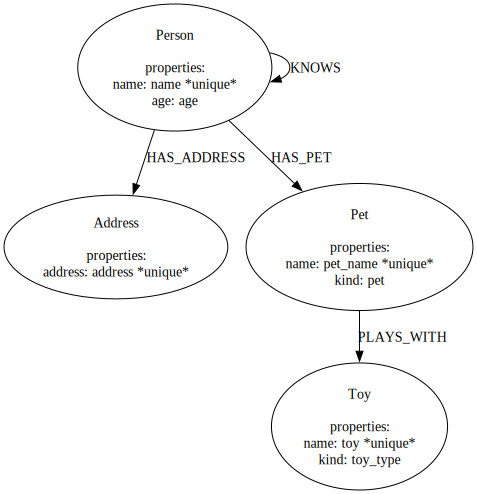

In [3]:
model.visualize()

And then we can generate some ingestion code to get our data into Neo4j.

In [4]:
from neo4j_runway import IngestionGenerator

In [5]:
gen = IngestionGenerator(data_model=model, csv_dir="./", csv_name="pets.csv")

In [6]:
load_csv_cypher = gen.generate_load_csv_string()

In [7]:
print(load_csv_cypher)

CREATE CONSTRAINT person_name IF NOT EXISTS FOR (n:Person) REQUIRE n.name IS UNIQUE;
CREATE CONSTRAINT address_address IF NOT EXISTS FOR (n:Address) REQUIRE n.address IS UNIQUE;
CREATE CONSTRAINT pet_name IF NOT EXISTS FOR (n:Pet) REQUIRE n.name IS UNIQUE;
CREATE CONSTRAINT toy_name IF NOT EXISTS FOR (n:Toy) REQUIRE n.name IS UNIQUE;
LOAD CSV WITH HEADERS FROM 'file:///pets.csv' as row
CALL {
    WITH row
    MERGE (n:Person {name: row.name})
    SET n.age = row.age
} IN TRANSACTIONS OF 10000 ROWS;
LOAD CSV WITH HEADERS FROM 'file:///pets.csv' as row
CALL {
    WITH row
    MERGE (n:Address {address: row.address})
    
} IN TRANSACTIONS OF 10000 ROWS;
LOAD CSV WITH HEADERS FROM 'file:///pets.csv' as row
CALL {
    WITH row
    MERGE (n:Pet {name: row.pet_name})
    SET n.kind = row.pet
} IN TRANSACTIONS OF 10000 ROWS;
LOAD CSV WITH HEADERS FROM 'file:///pets.csv' as row
CALL {
    WITH row
    MERGE (n:Toy {name: row.toy})
    SET n.kind = row.toy_type
} IN TRANSACTIONS OF 10000 ROWS;


This method will output a load_csv cypher file.

In [8]:
gen.generate_load_csv_file(file_name="pets_load_csv")